## BEYZA KOPUZ, 090200354

## Atabey's Comments

* Q1: Ingestion has a problem. No function. Also, you are doing aggregation for each column separately. It can be done for the whole dataframe in one go. Map is ok. (27pts)
* Q2: Crime and Population data is ingested correctly. However, not the shape files. So, the maps didn't work. (17pts)
* Q3: Data ingestion needs to be done more carefully. No plots. (13pts)

# Q1

### 1. Write a function that takes a year and a month as parameters that pulls the data for that specific year and month and returns the data as a pandas dataframe.

Importing the required libraries.

In [188]:
from urllib.request import urlopen
import pandas as pd
import json
import requests
import io

I couldn't write a function, I only pulled the data for September 2023 and continued with the question.

In [198]:
url = "https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/7b9a35a7-dc9c-4044-b117-1c0003104630/download/traffic_density_202309.csv"

In [199]:
s = requests.get(url).content
sep2023 = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [200]:
sep2023

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2023-09-01 00:00:00,29.317017,40.921326,sxkbg1,8,121,65,95
1,2023-09-01 00:00:00,29.163208,40.915833,sxk8z8,4,84,29,18
2,2023-09-01 00:00:00,29.130249,41.130066,sxk9yz,48,118,70,15
3,2023-09-01 00:00:00,29.086304,41.009216,sxk9mc,4,157,56,158
4,2023-09-01 00:00:00,28.811646,40.992737,sxk3pw,13,111,67,110
...,...,...,...,...,...,...,...,...
1640764,2023-09-30 23:00:00,29.020386,41.206970,sxkdkm,32,50,40,5
1640765,2023-09-30 23:00:00,28.855591,41.042175,sxk92x,2,39,18,44
1640766,2023-09-30 23:00:00,29.317017,40.992737,sxkc5n,61,153,92,28
1640767,2023-09-30 23:00:00,29.020386,40.998230,sxk9hr,7,50,22,14


### 3. Group the data with respect to GEOHASH column, and then aggragate

- 'LONGITUDE' column using 'first'

In [201]:
longitude = sep2023.groupby('GEOHASH')['LONGITUDE'].first()
longitude

GEOHASH
sx7chk    27.965698
sx7chm    27.965698
sx7cht    27.976685
sx7chw    27.976685
sx7chx    27.976685
            ...    
sxm41s    29.602661
sxm41u    29.613647
sxm445    29.624634
sxm44h    29.624634
sxm44k    29.635620
Name: LONGITUDE, Length: 2456, dtype: float64

- 'LATITUDE' column using 'first'

In [202]:
latitude = sep2023.groupby('GEOHASH')['LATITUDE'].first()
latitude

GEOHASH
sx7chk    40.981750
sx7chm    40.987244
sx7cht    40.987244
sx7chw    40.992737
sx7chx    40.998230
            ...    
sxm41s    41.157532
sxm41u    41.157532
sxm445    41.152039
sxm44h    41.157532
sxm44k    41.157532
Name: LATITUDE, Length: 2456, dtype: float64

- 'AVERAGE_SPEED' using 'mean'

In [203]:
avg_speed = sep2023.groupby('GEOHASH')['AVERAGE_SPEED'].mean()
avg_speed

GEOHASH
sx7chk    84.105187
sx7chm    70.066092
sx7cht    36.829023
sx7chw    67.688218
sx7chx    70.951149
            ...    
sxm41s    71.744409
sxm41u    58.456486
sxm445    73.248214
sxm44h    69.869410
sxm44k    54.235602
Name: AVERAGE_SPEED, Length: 2456, dtype: float64

- 'NUMBER_OF_VEHICLES' using 'mean'

In [204]:
vehicles = sep2023.groupby('GEOHASH')['NUMBER_OF_VEHICLES'].mean()
vehicles

GEOHASH
sx7chk    12.887608
sx7chm    24.155172
sx7cht    21.455460
sx7chw    27.090517
sx7chx    27.387931
            ...    
sxm41s     6.143770
sxm41u     5.213465
sxm445     4.132143
sxm44h     4.334526
sxm44k     5.041885
Name: NUMBER_OF_VEHICLES, Length: 2456, dtype: float64

### 4. Find the first 25 data points with
- the highest average number of vehicles
- the highest average speed
- the lowest average speed

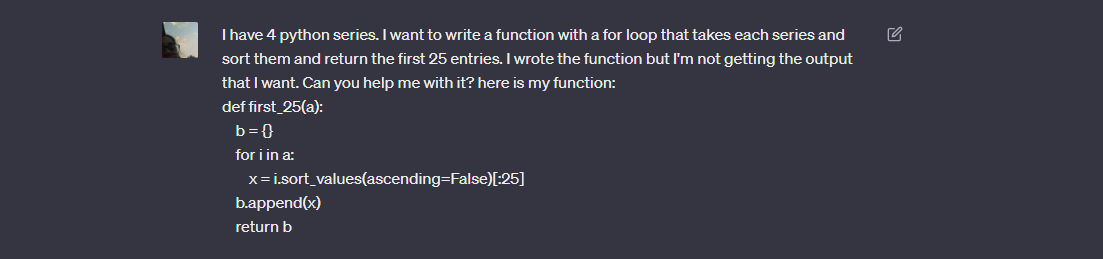

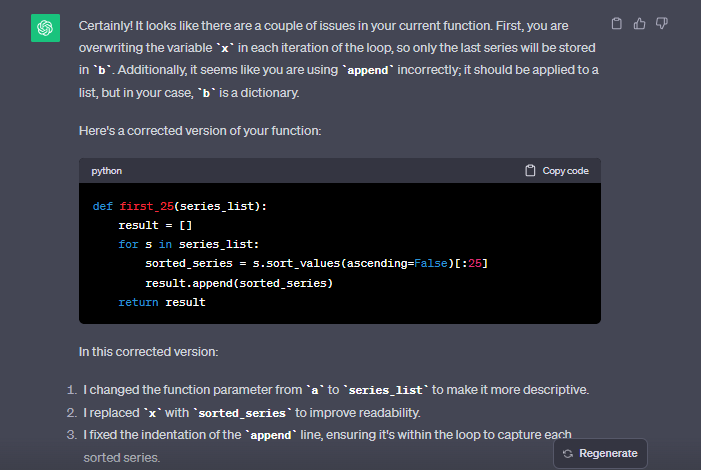

In [205]:
a_list = [longitude, latitude, avg_speed, vehicles]

In [206]:
def first_25(series_list):
    result = []
    for i in series_list:
        x = i.sort_values(ascending=False)[:25]
        result.append(x)
    return result

In [207]:
first_25(a_list)

[GEOHASH
 sxm44k    29.635620
 sxm44h    29.624634
 sxm445    29.624634
 sxm41u    29.613647
 sxm41g    29.613647
 sxm41s    29.602661
 sxm41e    29.602661
 sxm417    29.591675
 sxm41h    29.580688
 sxm415    29.580688
 sxm40v    29.569702
 sxm40u    29.569702
 sxm40y    29.569702
 sxm40w    29.558716
 sxm40t    29.558716
 sxm40q    29.547729
 sxm40n    29.536743
 sxkfpy    29.525757
 sxkfpx    29.514771
 sxkfpw    29.514771
 sxkfpq    29.503784
 sxkfpm    29.503784
 sxkfpr    29.503784
 sxkfph    29.492798
 sxkfp5    29.492798
 Name: LONGITUDE, dtype: float64,
 GEOHASH
 sx7ghq    41.344299
 sx7ghm    41.338806
 sx7ghs    41.333313
 sx7ghk    41.333313
 sx7ghe    41.327820
 sx7ghd    41.322327
 sx7ghf    41.322327
 sx7ghc    41.316833
 sx7ghb    41.311340
 sx7gj0    41.311340
 sx7fvp    41.305847
 sx7fvr    41.305847
 sx7fvq    41.300354
 sx7fvm    41.294861
 sx7fvk    41.289368
 sxk6g7    41.283875
 sxk6g5    41.283875
 sx7fve    41.283875
 sx7fv7    41.283875
 sxk6gf    41.278381
 sx

### 5. Create a heatmap using folium library on the 'NUMBER_OF_VEHICLES' column of the dataframe you constructed in Step 2.

Importing the required libraries.

In [208]:
import folium
from folium.plugins import HeatMap 
import numpy as np
from sklearn import preprocessing

In [209]:
map_data = sep2023[['LATITUDE','LONGITUDE','NUMBER_OF_VEHICLES']]

In [210]:
map_data

,LATITUDE,LONGITUDE,NUMBER_OF_VEHICLES
0,40.921326,29.317017,95
1,40.915833,29.163208,18
2,41.130066,29.130249,15
3,41.009216,29.086304,158
4,40.992737,28.811646,110
...,...,...,...
1640764,41.206970,29.020386,5
1640765,41.042175,28.855591,44
1640766,40.992737,29.317017,28
1640767,40.998230,29.020386,14


In order to create a heatmap, I need 3 things: latitude, longitude and weights. I already have the information regading location. And I can use the number of the vehicles as weights. When creating heatmaps, we need the weights to be between 0 and 1. So I need to normalize the `NUMBER_OF_VEHICLES` column.

In [211]:
weights = np.array(map_data['NUMBER_OF_VEHICLES'])

First I took the `NUMBER_OF_VEHICLES` column from the `map_data` dataframe and transformed it into a numpy array.

In [212]:
normalized_weights = preprocessing.normalize([weights])

Then I used the normalize method on the array to get a normalized array. This array is going to be the weights in the heatmap.

In [213]:
my_heatmap = folium.Map(location = [40.921326, 29.317017], zoom_start=9)

I chose the first location entry of the dataframe to be the center of my heatmap.

Now I need to prepare the data that is going to go into the creating of the heatmap.

In [214]:
normalizedweights = normalized_weights.transpose()

`normalized_weights` was an (1 x 1640769) array. I had to take the transpose of it to get the (1640769 x 1) array that I named as `normalizedweights`.

Now I will transfrom the array to a dataframe `w` with the column name as 'Weights'.

In [215]:
w = pd.DataFrame(normalizedweights, columns=['Weights'])

In [216]:
w

,Weights
0,0.000695
1,0.000132
2,0.000110
3,0.001155
4,0.000804
...,...
1640764,0.000037
1640765,0.000322
1640766,0.000205
1640767,0.000102


The final step with preparing the data for the heatmap is changing the `NUMBER_OF_VEHICLES` column with `Weights`.

In [217]:
map_data['NUMBER_OF_VEHICLES'] = w['Weights']

C:\Users\beyza\AppData\Local\Temp\ipykernel_4812\126592020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data['NUMBER_OF_VEHICLES'] = w['Weights']


In [218]:
map_data

,LATITUDE,LONGITUDE,NUMBER_OF_VEHICLES
0,40.921326,29.317017,0.000695
1,40.915833,29.163208,0.000132
2,41.130066,29.130249,0.000110
3,41.009216,29.086304,0.001155
4,40.992737,28.811646,0.000804
...,...,...,...
1640764,41.206970,29.020386,0.000037
1640765,41.042175,28.855591,0.000322
1640766,40.992737,29.317017,0.000205
1640767,40.998230,29.020386,0.000102


In [219]:
HeatMap(map_data).add_to(my_heatmap)

In [220]:
my_heatmap.save('heatmap.html')

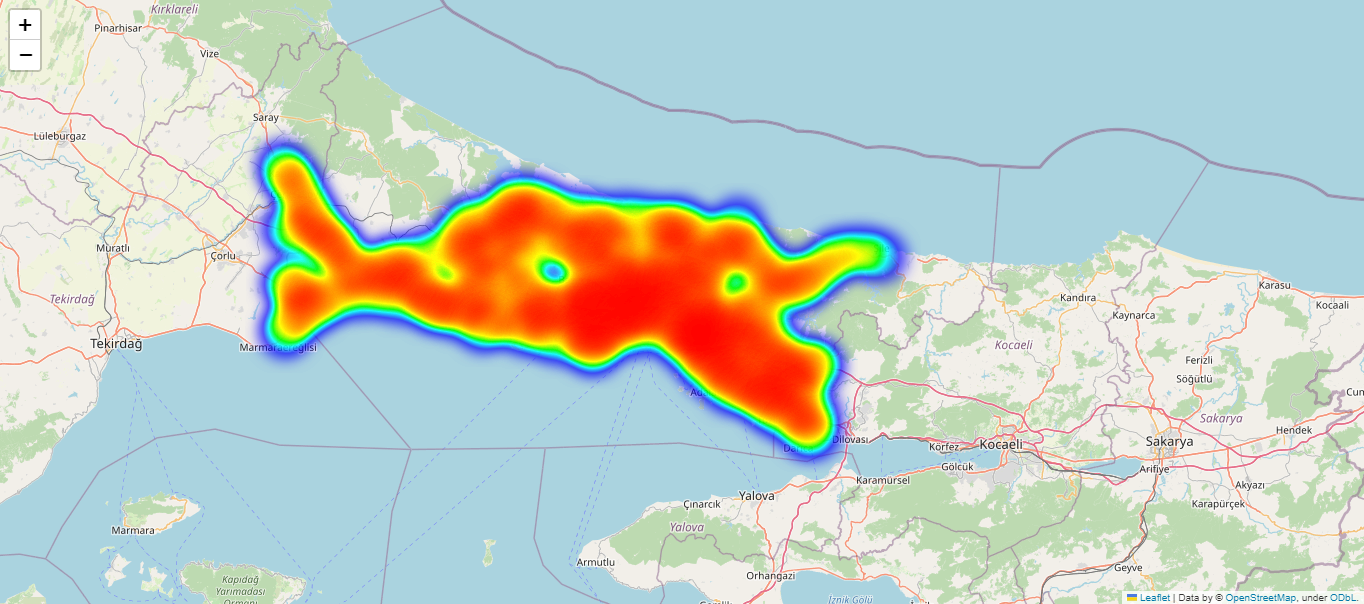

# Q2

Importing required libraries.

In [221]:
import urllib
import ssl
import zipfile
from io import BytesIO
import numpy as np

### - Get the shape files for Turkish administrative level 0 (iller) and level 1 (ilçeler) from GADM using their API.

In [222]:
level0 = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_TUR_0.json"

I came across the following error while trying to use urlopen: 'CERTIFICATE_VERIFY_FAILED'.
I searched for solutions and one of them suggested that I create an unverified ssl context.

In [223]:
ssl_context = ssl._create_unverified_context()

In [224]:
with urllib.request.urlopen(level0, context=ssl_context) as response:
    level_0 = response.read()

In [225]:
type(level_0)

bytes

I need to get the data in json format, not bytes. I asked ChatGpt to help me convert it into json.

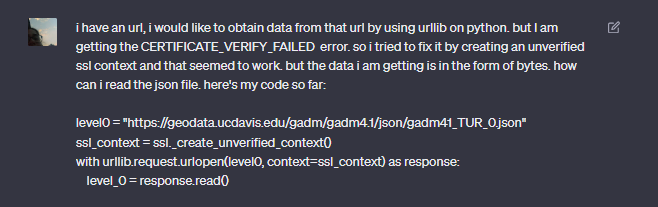

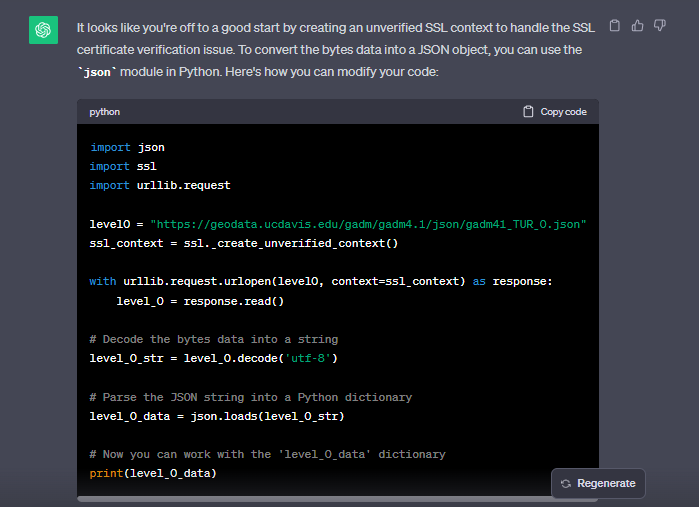

In [226]:
iller = json.loads(level_0.decode('utf-8'))

In [227]:
type(iller)

dict

In [228]:
iller.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [229]:
type(iller['features'])

list

In [230]:
iller['features'][0]

{'type': 'Feature',
 'properties': {'GID_0': 'TUR', 'COUNTRY': 'Turkey'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[36.1701, 35.8169],
     [36.1691, 35.8154],
     [36.1634, 35.8163],
     [36.1548, 35.8202],
     [36.1417, 35.8465],
     [36.1341, 35.8553],
     [36.1164, 35.8655],
     [36.0499, 35.8791],
     [36.0187, 35.8811],
     [36.0163, 35.8837],
     [36.0149, 35.8899],
     [36.0217, 35.9087],
     [36.0229, 35.9245],
     [36.0163, 35.9341],
     [36.0085, 35.9403],
     [36.0015, 35.9409],
     [35.9937, 35.9393],
     [35.9509, 35.9218],
     [35.9358, 35.9187],
     [35.9185, 35.9323],
     [35.9188, 35.9482],
     [35.9212, 35.9504],
     [35.9232, 35.9565],
     [35.9282, 35.9568],
     [35.9296, 35.9582],
     [35.929, 35.9618],
     [35.9368, 35.9682],
     [35.9415, 35.9701],
     [35.9551, 35.9829],
     [35.9571, 35.9824],
     [35.9574, 35.9868],
     [35.959, 35.9871],
     [35.9582, 35.9893],
     [35.9607, 35.9938],
     [35.9701, 36.0004],


In [231]:
type(iller['features'][0])

dict

In [232]:
iller['features'][0].keys()

dict_keys(['type', 'properties', 'geometry'])

In [233]:
type(iller['features'][0]['geometry'])

dict

In [234]:
type(iller['features'][0]['geometry']['coordinates'])

list

In [235]:
coordinates_0 = iller['features'][0]['geometry']['coordinates']

In [236]:
len(coordinates_0)

238

In [237]:
coordinates_0[0]

[[[36.1701, 35.8169],
  [36.1691, 35.8154],
  [36.1634, 35.8163],
  [36.1548, 35.8202],
  [36.1417, 35.8465],
  [36.1341, 35.8553],
  [36.1164, 35.8655],
  [36.0499, 35.8791],
  [36.0187, 35.8811],
  [36.0163, 35.8837],
  [36.0149, 35.8899],
  [36.0217, 35.9087],
  [36.0229, 35.9245],
  [36.0163, 35.9341],
  [36.0085, 35.9403],
  [36.0015, 35.9409],
  [35.9937, 35.9393],
  [35.9509, 35.9218],
  [35.9358, 35.9187],
  [35.9185, 35.9323],
  [35.9188, 35.9482],
  [35.9212, 35.9504],
  [35.9232, 35.9565],
  [35.9282, 35.9568],
  [35.9296, 35.9582],
  [35.929, 35.9618],
  [35.9368, 35.9682],
  [35.9415, 35.9701],
  [35.9551, 35.9829],
  [35.9571, 35.9824],
  [35.9574, 35.9868],
  [35.959, 35.9871],
  [35.9582, 35.9893],
  [35.9607, 35.9938],
  [35.9701, 36.0004],
  [35.9735, 36.001],
  [35.9765, 36.0046],
  [35.979, 36.0046],
  [35.9779, 36.0065],
  [35.9799, 36.0071],
  [35.9787, 36.0085],
  [35.9813, 36.0104],
  [35.979, 36.019],
  [35.964, 36.044],
  [35.9543, 36.0624],
  [35.9504, 36.073

In [238]:
coordinates_0[0][0]

[[36.1701, 35.8169],
 [36.1691, 35.8154],
 [36.1634, 35.8163],
 [36.1548, 35.8202],
 [36.1417, 35.8465],
 [36.1341, 35.8553],
 [36.1164, 35.8655],
 [36.0499, 35.8791],
 [36.0187, 35.8811],
 [36.0163, 35.8837],
 [36.0149, 35.8899],
 [36.0217, 35.9087],
 [36.0229, 35.9245],
 [36.0163, 35.9341],
 [36.0085, 35.9403],
 [36.0015, 35.9409],
 [35.9937, 35.9393],
 [35.9509, 35.9218],
 [35.9358, 35.9187],
 [35.9185, 35.9323],
 [35.9188, 35.9482],
 [35.9212, 35.9504],
 [35.9232, 35.9565],
 [35.9282, 35.9568],
 [35.9296, 35.9582],
 [35.929, 35.9618],
 [35.9368, 35.9682],
 [35.9415, 35.9701],
 [35.9551, 35.9829],
 [35.9571, 35.9824],
 [35.9574, 35.9868],
 [35.959, 35.9871],
 [35.9582, 35.9893],
 [35.9607, 35.9938],
 [35.9701, 36.0004],
 [35.9735, 36.001],
 [35.9765, 36.0046],
 [35.979, 36.0046],
 [35.9779, 36.0065],
 [35.9799, 36.0071],
 [35.9787, 36.0085],
 [35.9813, 36.0104],
 [35.979, 36.019],
 [35.964, 36.044],
 [35.9543, 36.0624],
 [35.9504, 36.0732],
 [35.9451, 36.0801],
 [35.9338, 36.1024],


Looks like the list I have is a nested list. I wrote a function to reach each coordinate in each list and put them in a dataframe. I wrote the function myself. But asked ChatGpt to double check it and it helped me correct a small part.

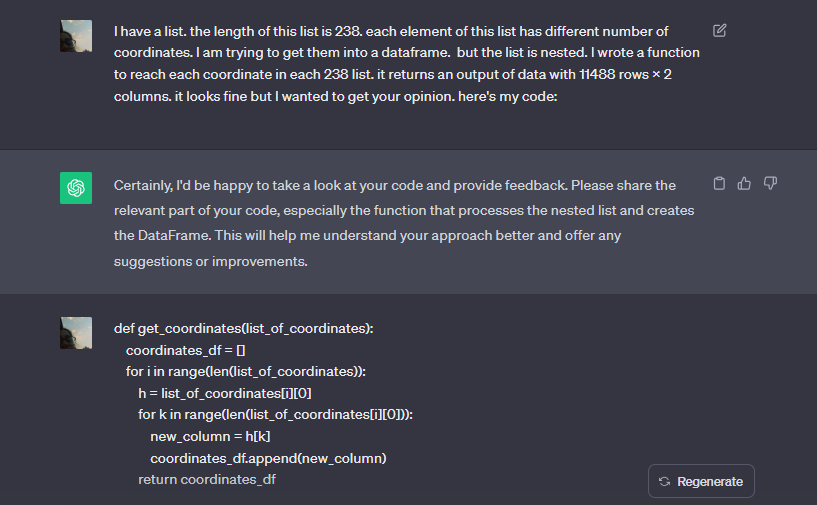

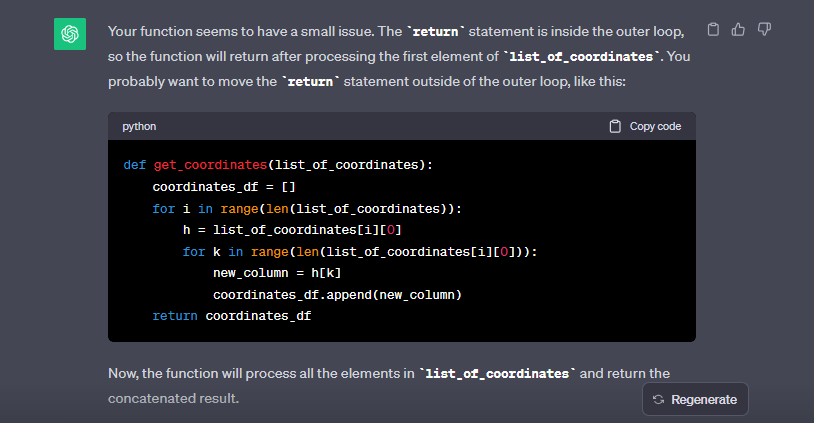

In [239]:
def get_coordinates(list_of_coordinates):
    coordinates_df = []
    for i in range(len(list_of_coordinates)):
        h = list_of_coordinates[i][0]
        for k in range(len(list_of_coordinates[i][0])):
            new_column = h[k]
            coordinates_df.append(new_column)
    return coordinates_df       

In [240]:
iller_list = get_coordinates(coordinates_0)

In [241]:
type(iller_list)

list

In [242]:
iller_df = pd.DataFrame(iller_list, columns=['longitude','latitude'])

In [243]:
iller_df

,longitude,latitude
0,36.1701,35.8169
1,36.1691,35.8154
2,36.1634,35.8163
3,36.1548,35.8202
4,36.1417,35.8465
...,...,...
15368,30.2588,41.2143
15369,30.2557,41.2157
15370,30.2574,41.2176
15371,30.2640,41.2176


I asked ChatGpt to help me unzip the zipfile and read the json file.


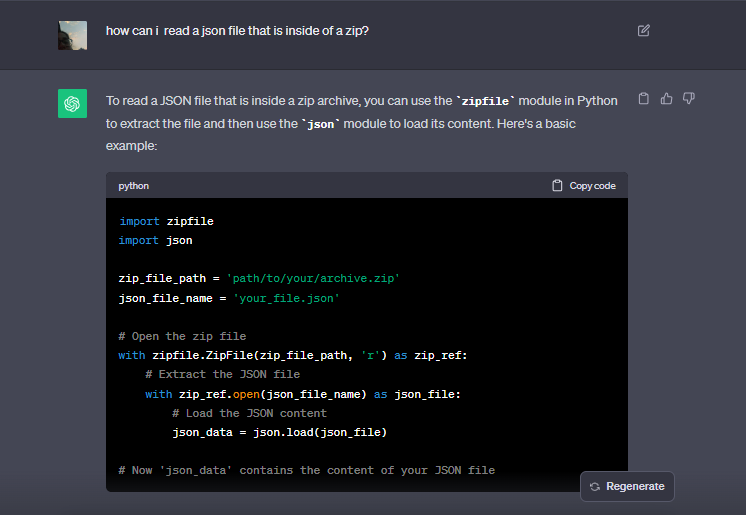

In [244]:
level1 = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_TUR_1.json.zip"

In [245]:
json_file_name = 'gadm41_TUR_1.json'

level1_data = requests.get(level1)
zip_data = BytesIO(level1_data.content)

# Open the zip file
with zipfile.ZipFile(zip_data, 'r') as zip_ref:
    # Extract the JSON file
    with zip_ref.open(json_file_name) as json_file:
        # Load the JSON content
        ilceler = json.load(json_file)

In [246]:
ilceler['features'][0]['geometry']['coordinates']

[[[[35.4143, 36.5882],
   [35.4085, 36.586],
   [35.4046, 36.5799],
   [35.4068, 36.5729],
   [35.3921, 36.5671],
   [35.3851, 36.5621],
   [35.3832, 36.5579],
   [35.3801, 36.5588],
   [35.376, 36.5535],
   [35.3721, 36.5515],
   [35.3682, 36.5524],
   [35.3596, 36.5501],
   [35.3543, 36.5443],
   [35.3474, 36.5443],
   [35.3429, 36.5396],
   [35.339, 36.5385],
   [35.339, 36.5435],
   [35.3368, 36.5468],
   [35.3257, 36.5579],
   [35.3296, 36.5679],
   [35.3238, 36.5699],
   [35.3221, 36.5724],
   [35.3354, 36.5776],
   [35.3335, 36.5807],
   [35.3351, 36.5838],
   [35.3315, 36.5824],
   [35.3282, 36.5857],
   [35.3376, 36.5882],
   [35.3276, 36.5876],
   [35.3271, 36.5893],
   [35.3365, 36.5896],
   [35.3376, 36.5965],
   [35.3363, 36.5965],
   [35.3363, 36.5988],
   [35.339, 36.6001],
   [35.3471, 36.599],
   [35.3462, 36.6035],
   [35.3243, 36.619],
   [35.3112, 36.6251],
   [35.2921, 36.6301],
   [35.2885, 36.6299],
   [35.2851, 36.6268],
   [35.2815, 36.6307],
   [35.2818, 36.63

In [247]:
coordinates_1 = ilceler['features'][0]['geometry']['coordinates']

The coordinate list for level 1 is nested list again. I can use the function I wrote for the level 0 coordinates again.

In [248]:
ilceler_list = get_coordinates(coordinates_1)

In [249]:
ilceler_df = pd.DataFrame(ilceler_list, columns=['longitude','latitude'])

In [250]:
ilceler_df

,longitude,latitude
0,35.4143,36.5882
1,35.4085,36.5860
2,35.4046,36.5799
3,35.4068,36.5729
4,35.3921,36.5671
...,...,...
650,35.6060,36.7038
651,35.6063,36.7010
652,35.6013,36.7002
653,35.6051,36.7054


I obtained the shape data. Let's move on to the population data now.

### - Get the census population data (both at level 0 and level 1) for the year 2000 from TUIK using their API.

In [251]:
import openpyxl

In [252]:
pop_0 = pd.read_excel(r'C:\Users\beyza\OneDrive\Masaüstü\MAT 381E\homeworks\data\HW2-Population-level0.xlsx')

In [253]:
pop_0

,TÜRKİYE İSTATİSTİK KURUMU,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000 GENEL NÜFUS SAYIMI VERİ TABANI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
89,Osmaniye,458.782,231.259,227.523,311.994,159.335,152.659,146.788,71.924,74.864
90,Düzce,314.266,161.927,152.339,130.632,67.656,62.976,183.634,94.271,89.363
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,Şehir : İl ve ilçe merkezleri sınırları içinde...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I am trying to figure out how to use the data here. I tried to get Adana's data first. Then I wrote a function for all provinces.

In [258]:
adana = pop_0.iloc[10]
adana

TÜRKİYE İSTATİSTİK KURUMU        Adana
Unnamed: 1                   1.849.478
Unnamed: 2                     920.001
Unnamed: 3                     929.477
Unnamed: 4                   1.397.853
Unnamed: 5                     693.586
Unnamed: 6                     704.267
Unnamed: 7                     451.625
Unnamed: 8                     226.415
Unnamed: 9                      225.21
Name: 10, dtype: object

In [259]:
adana_ = adana.to_frame().reset_index(drop=True).head(2)

In [260]:
a_ = adana_.T.reset_index(drop=True)

In [261]:
adanaa = a_.values.tolist()

In [262]:
adanaa

[['Adana', '1.849.478']]

In [263]:
adanaa[0]

['Adana', '1.849.478']

In [264]:
pop_0.iloc[90]

TÜRKİYE İSTATİSTİK KURUMU      Düzce
Unnamed: 1                   314.266
Unnamed: 2                   161.927
Unnamed: 3                   152.339
Unnamed: 4                   130.632
Unnamed: 5                    67.656
Unnamed: 6                    62.976
Unnamed: 7                   183.634
Unnamed: 8                    94.271
Unnamed: 9                    89.363
Name: 90, dtype: object

In [265]:
def il_populasyon(pop_il):
    il_populasyonu = []
    for i in range(10,91):
        il = pop_il.iloc[i].to_frame().reset_index(drop=True).head(2).T.reset_index(drop=True).values.tolist()[0]
        il_populasyonu.append(il)
    return il_populasyonu   

In [266]:
ilpop = il_populasyon(pop_0)

In [267]:
type(ilpop)

list

In [268]:
ilpopdf = pd.DataFrame(ilpop, columns=['İl', 'Nüfus'])

In [269]:
ilpopdf

,İl,Nüfus
0,Adana,1.849.478
1,Adıyaman,623.811
2,Afyon,812.416
3,Ağrı,528.744
4,Amasya,365.231
...,...,...
76,Yalova,168.593
77,Karabük,225.102
78,Kilis,114.724
79,Osmaniye,458.782


Now it's time to get level 1 population data.

In [270]:
pop_1 = pd.read_html(r'C:\Users\beyza\OneDrive\Masaüstü\MAT 381E\homeworks\data\HW2-Population-level1.xls')

In [271]:
pop_1

[                                           0
 0  İl, ilçe ve alt kademe belediye nüfusları,
       0      1         2           3        4        5        6
 0   NaN     İl      İlçe  Alt kademe   Toplam    Erkek    Kadın
 1   NaN    NaN       NaN         NaN      NaN      NaN      NaN
 2   NaN  Adana    Seyhan         NaN  807.934  396.728  411.206
 3   NaN    NaN   Yüreğir         NaN  322.776  161.362  161.414
 4   NaN    NaN    Aladağ         NaN    6.674    3.299    3.375
 ..   ..    ...       ...         ...      ...      ...      ...
 943 NaN    NaN   Çilimli         NaN    7.147    3.717    3.430
 944 NaN    NaN   Gölyaka         NaN    8.572    4.388    4.184
 945 NaN    NaN  Gümüşova         NaN   12.103    6.101    6.002
 946 NaN    NaN  Kaynaşlı         NaN    9.439    5.270    4.169
 947 NaN    NaN   Yığılca         NaN    3.728    1.886    1.842
 
 [948 rows x 7 columns]]

In [272]:
ilce_pop = pop_1[1].dropna(how='all').dropna(how='all', axis=1)
ilce_pop

,1,2,3,4,5,6
0,İl,İlçe,Alt kademe,Toplam,Erkek,Kadın
2,Adana,Seyhan,NaN,807.934,396.728,411.206
3,NaN,Yüreğir,NaN,322.776,161.362,161.414
4,NaN,Aladağ,NaN,6.674,3.299,3.375
5,NaN,Ceyhan,NaN,108.602,54.875,53.727
...,...,...,...,...,...,...
943,NaN,Çilimli,NaN,7.147,3.717,3.430
944,NaN,Gölyaka,NaN,8.572,4.388,4.184
945,NaN,Gümüşova,NaN,12.103,6.101,6.002
946,NaN,Kaynaşlı,NaN,9.439,5.270,4.169


In [273]:
ilcepop = ilce_pop.rename(columns=ilce_pop.iloc[0]).drop(ilce_pop.index[0]).reset_index(drop=True)

In [274]:
ilcepop

,İl,İlçe,Alt kademe,Toplam,Erkek,Kadın
0,Adana,Seyhan,NaN,807.934,396.728,411.206
1,NaN,Yüreğir,NaN,322.776,161.362,161.414
2,NaN,Aladağ,NaN,6.674,3.299,3.375
3,NaN,Ceyhan,NaN,108.602,54.875,53.727
4,NaN,Feke,NaN,4.632,2.393,2.239
...,...,...,...,...,...,...
941,NaN,Çilimli,NaN,7.147,3.717,3.430
942,NaN,Gölyaka,NaN,8.572,4.388,4.184
943,NaN,Gümüşova,NaN,12.103,6.101,6.002
944,NaN,Kaynaşlı,NaN,9.439,5.270,4.169


In [275]:
ilcepopdf = ilcepop[['İlçe','Toplam']]

In [276]:
ilcepopdf

,İlçe,Toplam
0,Seyhan,807.934
1,Yüreğir,322.776
2,Aladağ,6.674
3,Ceyhan,108.602
4,Feke,4.632
...,...,...
941,Çilimli,7.147
942,Gölyaka,8.572
943,Gümüşova,12.103
944,Kaynaşlı,9.439


### - Get the crime statistics (suç türü ve suçun işlendiği ile göre infaz kurumuna giren hükümlüler) from TUIK using their API.

In [277]:
crime = pd.read_excel(r'C:\Users\beyza\OneDrive\Masaüstü\MAT 381E\homeworks\data\HW2-Crime.xlsx')

In [278]:
crime

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Sütunlar,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,Satırlar,NaN,NaN,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,...,Yalova-77,Yozgat-66,Zonguldak-67,Çanakkale-17,Çankırı-18,Çorum-19,İstanbul-34,İzmir-35,Şanlıurfa-63,Şırnak-73
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Suç Işlenen Ile Göre Ceza Infaz Kurumuna Giren...,Suç türü:26. (Dolandırıcılık),2000.0,187,15,47,12,8,854,306,...,9,13,30,39,5,49,1887,578,20,1
4,NaN,Suç türü:36. (Orman Suçları),2000.0,61,9,17,NaN,15,3,38,...,1,16,16,21,4,14,18,21,NaN,NaN
5,NaN,Suç türü:38. (İcra İflas Kanununa Muhalefet),2000.0,581,166,1258,138,509,5192,2566,...,77,601,601,1260,190,742,5172,3346,347,21
6,NaN,Suç türü:42. (Zina),2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,"Suç türü:43. (Dövmek, Yaralamak)",2000.0,134,12,63,47,6,255,141,...,17,28,51,31,4,19,611,190,42,8
8,NaN,"Suç türü:44. (Rüşvet, İrtikap Ve Sahtecilik)",2000.0,77,1,17,8,3,133,65,...,13,9,7,17,1,15,370,77,16,16
9,NaN,Suç türü:45. (Ateşli Silahlar),2000.0,92,8,23,6,2,105,71,...,7,5,15,10,1,12,508,83,67,16


In [279]:
crimes = crime.rename(columns=crime.iloc[0]).drop(crime.index[0])

In [280]:
crimes.dropna(how='all', axis=0, inplace=True)

In [281]:
crimes.reset_index(drop=True)

,Satırlar,NaN,NaN,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,...,Yalova-77,Yozgat-66,Zonguldak-67,Çanakkale-17,Çankırı-18,Çorum-19,İstanbul-34,İzmir-35,Şanlıurfa-63,Şırnak-73
0,Suç Işlenen Ile Göre Ceza Infaz Kurumuna Giren...,Suç türü:26. (Dolandırıcılık),2000.0,187,15,47,12,8,854,306,...,9,13,30,39,5,49,1887,578,20,1
1,NaN,Suç türü:36. (Orman Suçları),2000.0,61,9,17,NaN,15,3,38,...,1,16,16,21,4,14,18,21,NaN,NaN
2,NaN,Suç türü:38. (İcra İflas Kanununa Muhalefet),2000.0,581,166,1258,138,509,5192,2566,...,77,601,601,1260,190,742,5172,3346,347,21
3,NaN,Suç türü:42. (Zina),2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,"Suç türü:43. (Dövmek, Yaralamak)",2000.0,134,12,63,47,6,255,141,...,17,28,51,31,4,19,611,190,42,8
5,NaN,"Suç türü:44. (Rüşvet, İrtikap Ve Sahtecilik)",2000.0,77,1,17,8,3,133,65,...,13,9,7,17,1,15,370,77,16,16
6,NaN,Suç türü:45. (Ateşli Silahlar),2000.0,92,8,23,6,2,105,71,...,7,5,15,10,1,12,508,83,67,16
7,NaN,Suç türü:46. (Zimmete Para Geçirmek),2000.0,5,NaN,1,1,NaN,20,7,...,NaN,NaN,1,5,NaN,2,31,8,3,2
8,NaN,Suç türü:47. (Adam Öldürmek),2000.0,159,18,48,23,21,176,101,...,11,19,31,18,10,27,429,181,56,12
9,NaN,"Suç türü:48. (Kız, Kadın Ve Erkek Kaçırmak)",2000.0,17,1,12,5,5,15,43,...,3,4,5,15,2,4,57,23,1,NaN


Dropping the first and third columns because I don't need them.

In [282]:
crimes_1 = crimes.drop(crimes.columns[[0,2]], axis=1)

Replacing NaN with a suitable column name.

In [283]:
crimes_2 = crimes_1.rename(columns={np.nan: 'Suç Türü'})

In [284]:
crimes_2.head()

,Suç Türü,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,Ardahan-75,Artvin-8,...,Yalova-77,Yozgat-66,Zonguldak-67,Çanakkale-17,Çankırı-18,Çorum-19,İstanbul-34,İzmir-35,Şanlıurfa-63,Şırnak-73
3,Suç türü:26. (Dolandırıcılık),187,15,47,12,8,854,306,4,3,...,9,13,30,39,5,49,1887,578,20,1
4,Suç türü:36. (Orman Suçları),61,9,17,NaN,15,3,38,22,11,...,1,16,16,21,4,14,18,21,NaN,NaN
5,Suç türü:38. (İcra İflas Kanununa Muhalefet),581,166,1258,138,509,5192,2566,68,181,...,77,601,601,1260,190,742,5172,3346,347,21
6,Suç türü:42. (Zina),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Suç türü:43. (Dövmek, Yaralamak)",134,12,63,47,6,255,141,17,8,...,17,28,51,31,4,19,611,190,42,8


In [285]:
crimes_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 3 to 22
Data columns (total 83 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Suç Türü          20 non-null     object
 1   Adana-1           19 non-null     object
 2   Adıyaman-2        17 non-null     object
 3   Afyonkarahisar-3  19 non-null     object
 4   Aksaray-68        17 non-null     object
 5   Amasya-5          15 non-null     object
 6   Ankara-6          19 non-null     object
 7   Antalya-7         19 non-null     object
 8   Ardahan-75        16 non-null     object
 9   Artvin-8          17 non-null     object
 10  Aydın-9           19 non-null     object
 11  Ağrı-4            16 non-null     object
 12  Balıkesir-10      19 non-null     object
 13  Bartın-74         16 non-null     object
 14  Batman-72         16 non-null     object
 15  Bayburt-69        12 non-null     object
 16  Bilecik-11        17 non-null     object
 17  Bingöl-12         

Dropping the 'Yabancı Ülke' column.

In [286]:
crimes_3 = crimes_2.drop(crimes_2.columns[72], axis=1)

In [287]:
crimes_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 3 to 22
Data columns (total 82 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Suç Türü          20 non-null     object
 1   Adana-1           19 non-null     object
 2   Adıyaman-2        17 non-null     object
 3   Afyonkarahisar-3  19 non-null     object
 4   Aksaray-68        17 non-null     object
 5   Amasya-5          15 non-null     object
 6   Ankara-6          19 non-null     object
 7   Antalya-7         19 non-null     object
 8   Ardahan-75        16 non-null     object
 9   Artvin-8          17 non-null     object
 10  Aydın-9           19 non-null     object
 11  Ağrı-4            16 non-null     object
 12  Balıkesir-10      19 non-null     object
 13  Bartın-74         16 non-null     object
 14  Batman-72         16 non-null     object
 15  Bayburt-69        12 non-null     object
 16  Bilecik-11        17 non-null     object
 17  Bingöl-12         

There are null values in this dataframe. I am going to replace NaN values with 0.

In [288]:
crime_df = crimes_3.fillna(0)

In [289]:
crimedf = crime_df.T

In [290]:
crimedf.columns = crimedf.iloc[0]

In [291]:
crimedf_final = crimedf.drop(crimedf.index[0])

In [292]:
crimedf_final

Suç Türü,Suç türü:26. (Dolandırıcılık),Suç türü:36. (Orman Suçları),Suç türü:38. (İcra İflas Kanununa Muhalefet),Suç türü:42. (Zina),"Suç türü:43. (Dövmek, Yaralamak)","Suç türü:44. (Rüşvet, İrtikap Ve Sahtecilik)",Suç türü:45. (Ateşli Silahlar),Suç türü:46. (Zimmete Para Geçirmek),Suç türü:47. (Adam Öldürmek),"Suç türü:48. (Kız, Kadın Ve Erkek Kaçırmak)",Suç türü:49. (Kabahatler),Suç türü:50. (Trafik Kanunu'Na Muhalefet),Suç türü:51. (Irza Geçmek Ve Sarkıntılık),Suç türü:52. (Cebri Hırsızlık),"Suç türü:53. (Sövme, Hakaret)",Suç türü:54. (Para Ve Mal Kaçakçılığı Yapmak),"Suç türü:55. (Uyuşturucu Madde Kullanmak, Satmak, Satın Almak)",Suç türü:8. (Hırsızlık),Suç türü:98. (Diğer),Ölçüm bazında
Adana-1,187,61,581,0,134,77,92,5,159,17,15,20,42,36,2,8,101,177,338,2052
Adıyaman-2,15,9,166,0,12,1,8,0,18,1,5,15,3,5,0,6,12,24,13,313
Afyonkarahisar-3,47,17,1258,0,63,17,23,1,48,12,21,27,23,5,4,5,8,37,71,1687
Aksaray-68,12,0,138,0,47,8,6,1,23,5,8,12,23,7,1,0,3,41,24,359
Amasya-5,8,15,509,0,6,3,2,0,21,5,2,21,6,0,0,7,0,14,9,628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Çorum-19,49,14,742,0,19,15,12,2,27,4,6,31,11,6,1,3,2,23,25,992
İstanbul-34,1887,18,5172,0,611,370,508,31,429,57,39,92,152,324,9,44,921,1384,857,12905
İzmir-35,578,21,3346,0,190,77,83,8,181,23,50,202,67,67,10,30,171,305,438,5847
Şanlıurfa-63,20,0,347,0,42,16,67,3,56,1,5,9,5,10,0,3,33,16,63,696


The data looks clean enough now.

### 1. Create a GeoPandas dataframe from the shape data, and merge it with population data (with level 1).

Importing the required libraries.

In [293]:
import geopandas
import matplotlib.pyplot as plt

In [294]:
ilceler_df

,longitude,latitude
0,35.4143,36.5882
1,35.4085,36.5860
2,35.4046,36.5799
3,35.4068,36.5729
4,35.3921,36.5671
...,...,...
650,35.6060,36.7038
651,35.6063,36.7010
652,35.6013,36.7002
653,35.6051,36.7054


In [295]:
geodf = geopandas.GeoDataFrame(
    ilceler_df, geometry=geopandas.points_from_xy(ilceler_df['longitude'], ilceler_df['latitude']), crs="EPSG:4326"
)

In [296]:
geodf

,longitude,latitude,geometry
0,35.4143,36.5882,POINT (35.41430 36.58820)
1,35.4085,36.5860,POINT (35.40850 36.58600)
2,35.4046,36.5799,POINT (35.40460 36.57990)
3,35.4068,36.5729,POINT (35.40680 36.57290)
4,35.3921,36.5671,POINT (35.39210 36.56710)
...,...,...,...
650,35.6060,36.7038,POINT (35.60600 36.70380)
651,35.6063,36.7010,POINT (35.60630 36.70100)
652,35.6013,36.7002,POINT (35.60130 36.70020)
653,35.6051,36.7054,POINT (35.60510 36.70540)


This is the GeoPandas dataframe I created. Now I am going to merge it with the population data (level 1).

In [297]:
ilcepopdf

,İlçe,Toplam
0,Seyhan,807.934
1,Yüreğir,322.776
2,Aladağ,6.674
3,Ceyhan,108.602
4,Feke,4.632
...,...,...
941,Çilimli,7.147
942,Gölyaka,8.572
943,Gümüşova,12.103
944,Kaynaşlı,9.439


In [298]:
geodf_ilcepop = pd.concat([geodf, ilcepopdf], axis=1, join="inner")

In [299]:
geodf_ilcepop

,longitude,latitude,geometry,İlçe,Toplam
0,35.4143,36.5882,POINT (35.41430 36.58820),Seyhan,807.934
1,35.4085,36.5860,POINT (35.40850 36.58600),Yüreğir,322.776
2,35.4046,36.5799,POINT (35.40460 36.57990),Aladağ,6.674
3,35.4068,36.5729,POINT (35.40680 36.57290),Ceyhan,108.602
4,35.3921,36.5671,POINT (35.39210 36.56710),Feke,4.632
...,...,...,...,...,...
650,35.6060,36.7038,POINT (35.60600 36.70380),Acıgöl,6.702
651,35.6063,36.7010,POINT (35.60630 36.70100),Avanos,11.921
652,35.6013,36.7002,POINT (35.60130 36.70020),Derinkuyu,11.092
653,35.6051,36.7054,POINT (35.60510 36.70540),Gülşehir,9.377


My dataframe for level 1 population had 946 rows but the geopandas df has 655 rows. Unfortunately I have to continue with this dataframe, losing the data on the other 291 district data.

### 2. Using GeoPandas sketch a choropleth map for the population at administrative level 1 (ilçeler)

<Axes: >

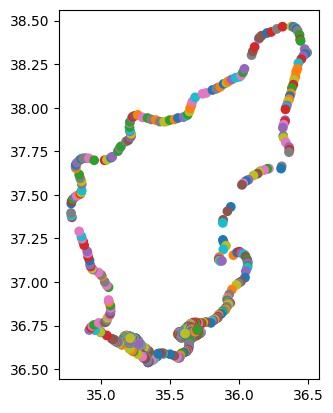

In [300]:
geodf_ilcepop.plot(column='Toplam')

### 3. Merge shape data (level 0), the population data (level 0) and the cleaned crime data.

# Q3

1. Get the following data for the following countries: Albania, Bosnia and Herzegovina, Bulgaria, Croatia, Kosovo, Montenegro, North Macedonia, Romania, Serbia, Slovenia, Turkey, Greece, Cyprus, Malta, Italy, Poland, Belarus, and Ukraine.
 - Child mortality under 5 year olds
 - Female literacy rate for ages 15+
 - Female labor force participation rate for ages 15+
 - Poverty headcount ratio at $3.65 a day as a percentage of the population
 - GDP Per capita
 - CPIA gender equality rating

Importing required libraries.

In [3]:
import wbgapi as wb

In [4]:
country_list = ['ALB','BIH','HRV','XKX','MNT','MKD','ROM','SER','SVN','TUR','GRC','CYP','MLT','ITA','POL','BLR','UKR']

 - Child mortality under 5 year olds

I found __[this](https://data.worldbank.org/indicator/SH.DYN.MORT?locations=1W&start=1990&view=chart)__ data set in World Bank. I used wb.data.DataFrame and wrote the indicator in the link, I wrote the wanted country codes. The world data started from the year 1990 and ended in 2021.

In [5]:
child_mortality = wb.data.DataFrame('SH.DYN.MORT', country_list, range(1990,2021))
child_mortality

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,,,,,,,,,,
ALB,40.8,39.1,37.6,36.3,35.0,33.8,32.5,31.2,29.9,28.5,...,12.2,11.2,10.5,9.9,9.6,9.4,9.3,9.3,9.4,9.4
BIH,18.1,16.8,35.5,35.0,26.1,14.0,12.2,11.5,10.9,10.3,...,6.9,6.7,6.5,6.4,6.3,6.2,6.1,6.0,5.9,5.7
BLR,15.2,15.2,15.3,15.5,15.7,15.7,15.5,15.1,14.5,13.7,...,5.2,4.9,4.6,4.3,4.1,3.9,3.6,3.4,3.1,2.9
CYP,11.3,11.1,10.7,10.2,9.6,9.0,8.5,8.0,7.5,7.0,...,3.3,3.1,3.0,2.9,2.8,2.7,2.7,2.8,2.8,2.8
GRC,10.4,9.8,9.4,9.1,8.8,8.5,8.1,7.7,7.3,6.9,...,3.9,4.0,4.2,4.3,4.4,4.4,4.3,4.2,4.0,3.9
HRV,12.9,14.0,11.5,10.9,10.4,10.0,9.6,9.3,8.9,8.6,...,5.3,5.2,5.1,5.0,4.9,4.9,4.8,4.8,4.7,4.7
ITA,9.7,9.3,8.9,8.5,8.0,7.5,7.0,6.6,6.2,5.9,...,3.9,3.8,3.7,3.6,3.5,3.4,3.3,3.2,3.0,2.8
MKD,36.9,34.6,33.0,31.5,28.5,24.5,21.1,19.2,18.3,17.4,...,10.0,10.1,10.6,11.2,11.4,10.9,9.6,8.1,6.8,5.9
MLT,11.4,11.0,10.6,10.2,9.8,9.4,9.0,8.6,8.2,7.9,...,6.8,6.8,6.7,6.7,6.6,6.5,6.4,6.3,6.1,6.0


 - Female literacy rate for ages 15+
 
 I am using __[this](https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS)__ dataset

In [6]:
female_literacy = wb.data.DataFrame('SE.ADT.LITR.FE.ZS', country_list, range(1990,2022))
female_literacy

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.136070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIH,NaN,81.959328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,94.910492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.419724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.876511,NaN,NaN
CYP,NaN,NaN,91.001778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.150002
GRC,NaN,89.353302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HRV,NaN,94.817223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.239998
ITA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.223892,NaN,NaN
MKD,NaN,NaN,NaN,NaN,90.928017,NaN,NaN,NaN,NaN,NaN,...,96.400002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MLT,NaN,NaN,NaN,NaN,NaN,89.242638,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.419998


 - Female labor force participation rate for ages 15+
 
 I am using __[this](https://data.worldbank.org/indicator/SL.TLF.CACT.FE.ZS)__ dataset.

In [7]:
female_labor = wb.data.DataFrame('SL.TLF.CACT.FE.ZS', country_list, range(1990,2022))
female_labor

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ALB,51.289,54.434,55.197,54.196,53.359,52.138,51.335,52.348,51.553,50.497,...,48.821,43.660,43.818,46.989,49.763,49.609,51.284,52.815,49.620,51.653
BIH,32.019,31.876,31.485,30.903,30.374,29.957,29.882,29.794,29.749,29.703,...,34.106,33.994,35.506,35.433,34.845,35.409,34.894,36.947,36.009,39.630
BLR,53.348,53.109,52.958,52.813,52.850,52.977,52.813,52.570,52.559,52.742,...,57.663,57.875,58.044,58.182,58.289,58.134,57.629,57.832,57.495,57.690
CYP,41.828,42.501,42.992,43.694,44.403,45.110,45.816,46.524,47.234,47.945,...,56.625,56.763,58.325,57.503,56.172,56.635,57.200,57.284,56.396,57.638
GRC,35.537,33.427,34.717,34.978,35.710,36.413,37.724,37.746,39.601,40.599,...,44.099,43.948,44.323,44.944,45.180,44.885,44.492,44.668,43.800,43.882
HRV,45.984,46.284,46.059,45.827,45.594,45.368,45.152,44.942,44.735,44.533,...,44.537,44.579,46.416,46.860,45.409,45.543,45.476,45.139,44.638,45.746
ITA,34.973,35.961,33.970,33.498,33.488,33.515,33.947,34.163,34.673,35.377,...,39.721,39.692,40.141,39.789,40.457,40.932,41.096,41.248,39.834,40.097
MKD,45.377,45.640,45.084,44.550,44.015,43.448,42.872,41.019,40.882,40.766,...,43.085,44.543,44.038,43.503,42.358,42.764,43.080,44.976,43.737,42.924
MLT,26.890,27.009,27.508,28.057,28.265,28.418,28.980,29.574,29.636,29.929,...,38.204,40.426,42.083,42.822,44.536,46.103,48.684,50.253,51.982,52.753


 - Poverty headcount ratio at $3.65 a day as a percentage of the population
 
 I am using __[this](https://data.worldbank.org/indicator/SI.POV.LMIC)__ dataset. 

In [8]:
poverty = wb.data.DataFrame('SI.POV.LMIC', country_list, range(1990,2022))
poverty

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ALB,NaN,NaN,NaN,NaN,NaN,NaN,8.9,NaN,NaN,NaN,...,4.8,NaN,9.7,3.7,4.7,3.6,2.7,1.2,1.5,NaN
BIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.7,51.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.1,NaN
CYP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.2,0.2,0.1,0.1,0.1,0.1,0.2,0.1,NaN
GRC,NaN,NaN,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,...,2.8,2.6,2.9,2.8,2.0,1.6,0.3,1.3,1.6,NaN
HRV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,1.7,1.3,1.3,1.1,0.7,0.6,0.7,NaN
ITA,NaN,0.2,NaN,1.9,NaN,1.2,NaN,NaN,2.2,NaN,...,1.8,2.0,1.8,2.6,2.3,1.8,2.1,1.3,1.2,NaN
MKD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.1,12.0,10.5,10.1,9.7,9.2,7.1,7.5,NaN,NaN
MLT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3,0.0,0.0,0.1,0.2,0.2,0.2,0.4,0.7,NaN


 - GDP Per capita
 
 I am using __[this](https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD)__ dataset.

In [9]:
gdp = wb.data.DataFrame('NY.GDP.PCAP.PP.CD', country_list, range(1990,2022))
gdp

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ALB,2549.746801,1909.319160,1823.503609,2057.692048,2290.143917,2666.081951,2980.418871,2717.684701,3021.179604,3471.646616,...,10526.250106,10570.966045,11259.303681,11658.894897,12078.799334,12770.991863,13498.184607,14407.437645,14064.038615,15532.706056
BIH,NaN,NaN,NaN,NaN,943.249474,1166.999433,2155.164607,2844.360969,3270.700345,3601.981500,...,10109.400688,10788.268083,11148.387834,11826.066014,12869.768404,13582.184752,14801.263003,16118.666804,15860.104522,17705.806977
BLR,5226.139654,5335.578804,4922.457216,4645.893574,4194.881094,3849.897233,4043.749905,4601.503085,5066.942837,5337.015840,...,18105.286718,18994.190189,19007.997324,18095.703419,17785.943197,18356.066058,19430.909210,20106.068913,20317.231920,21928.685757
CYP,13349.030273,13547.259766,14760.485352,14853.085938,15736.447266,17097.171875,17319.966797,17780.939453,18759.564453,19662.640625,...,31923.937500,30451.695312,30171.142578,31922.349609,35878.414062,38415.109375,40676.570312,44039.011719,41425.925781,44405.007812
GRC,13312.049300,14019.574237,14329.548186,14349.857438,14874.729891,15433.252677,16149.904496,17155.880484,18034.213481,18464.732075,...,24911.119631,25986.650316,26625.061810,26760.363303,27511.801016,28604.860940,29617.548340,31155.907118,28416.523902,31294.800289
HRV,NaN,NaN,NaN,NaN,NaN,8054.474575,8804.354357,9534.266307,9887.481031,9939.949509,...,21463.732251,22134.729592,22360.964667,23338.217404,25260.200897,27206.935714,28909.416561,31588.026719,29690.153680,34721.872681
ITA,18638.231713,19551.432040,20150.135842,20439.352204,21320.504368,22395.613683,23058.976843,23875.779134,25021.659683,25602.389472,...,36486.296787,36314.697101,36194.873919,36899.385209,39926.954663,41581.120791,43036.243777,45799.772252,43144.406419,46705.017906
MKD,5398.604132,5256.024199,5069.324371,4852.678559,4904.617908,4947.884576,5071.955409,5226.785254,5448.324692,5724.447332,...,11915.658551,12727.320453,13434.848748,13888.301136,15137.934517,15706.482701,16796.387924,18007.184765,17324.856242,18344.310046
MLT,8847.346082,9460.362509,10025.881837,10616.844736,11349.692731,12237.025000,12927.677609,14290.042502,15049.535716,16052.830370,...,30243.983205,32295.671001,34344.092199,37455.123154,39705.641867,43508.783257,45557.716802,49221.341226,44925.831185,49974.775151


 - CPIA gender equality rating
 
I am using __[this](https://data.worldbank.org/indicator/IQ.CPA.GNDR.XQ)__ dataset.

In [10]:
cpia = wb.data.DataFrame('IQ.CPA.GNDR.XQ', country_list, range(2005,2022))
cpia

,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,
ALB,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIH,4.0,4.5,4.5,4.5,4.5,4.5,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CYP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HRV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MKD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MLT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Merge the data you obtained into a single data frame such that you have the following columns. Pivot the data frames whenever necessary:
- Year
- Country
- Child Mortality
- Female Literacy
- Female Workforce Participation
- Poverty
- GDP
- Gender Equality

I tried to merge the data but I couldn't do it.

In [11]:
merged_df1 = pd.concat([child_mortality.T, female_labor.T, gdp.T], axis=1, keys=['child', 'female', 'gdp'])

In [12]:
merged_df1

child                                                       ...  \
economy   ALB   BIH   BLR   CYP   GRC   HRV  ITA   MKD   MLT   POL  ...   
YR1990   40.8  18.1  15.2  11.3  10.4  12.9  9.7  36.9  11.4  17.4  ...   
YR1991   39.1  16.8  15.2  11.1   9.8  14.0  9.3  34.6  11.0  16.9  ...   
YR1992   37.6  35.5  15.3  10.7   9.4  11.5  8.9  33.0  10.6  16.4  ...   
YR1993   36.3  35.0  15.5  10.2   9.1  10.9  8.5  31.5  10.2  16.0  ...   
YR1994   35.0  26.1  15.7   9.6   8.8  10.4  8.0  28.5   9.8  15.4  ...   
YR1995   33.8  14.0  15.7   9.0   8.5  10.0  7.5  24.5   9.4  14.5  ...   
YR1996   32.5  12.2  15.5   8.5   8.1   9.6  7.0  21.1   9.0  13.2  ...   
YR1997   31.2  11.5  15.1   8.0   7.7   9.3  6.6  19.2   8.6  12.0  ...   
YR1998   29.9  10.9  14.5   7.5   7.3   8.9  6.2  18.3   8.2  10.9  ...   
YR1999   28.5  10.3  13.7   7.0   6.9   8.6  5.9  17.4   7.9  10.0  ...   
YR2000   27.2   9.9  12.8   6.5   6.4   8.3  5.6  16.0   7.6   9.3  ...   
YR2001   25.8   9.6  11.8   6.1   6.0   8.0  5.3  14.8   7.4   8.8  ...   
YR2002   24.4   9.3  10.9   5.7   5.6   7.7  5.1  14.3   7.2   8.4  ...   
YR2003   22.9   9.2  10.1   5.3   5.2   7.3  4.8  14.4   7.0   8.1  ...   
YR2004   21.5   9.0   9.4   5.0   4.9   7.0  4.6  14.3   7.0   7.8  ...   
YR2005   20.0   8.9   8.7   4.6   4.6   6.7  4.5  13.7   6.9   7.6  ...   
YR2006   18.5   8.6   8.0   4.3   4.3   6.4  4.3  13.0   6.9   7.3  ...   
YR2007   17.1   8.3   7.3   4.0   4.1   6.1  4.2  12.3   6.8   7.0  ...   
YR2008   15.8   7.9   6.6   3.8   4.0   5.9  4.1  11.7   6.8   6.7  ...   
YR2009   14.5   7.5   6.1   3.6   3.9   5.7  4.1  11.0   6.8   6.3  ...   
YR2010   13.3   7.2   5.6   3.5   3.9   5.5  4.0  10.4   6.8   6.0  ...   
YR2011   12.2   6.9   5.2   3.3   3.9   5.3  3.9  10.0   6.8   5.7  ...   
YR2012   11.2   6.7   4.9   3.1   4.0   5.2  3.8  10.1   6.8   5.4  ...   
YR2013   10.5   6.5   4.6   3.0   4.2   5.1  3.7  10.6   6.7   5.2  ...   
YR2014    9.9   6.4   4.3   2.9   4.3   5.0  3.6  11.2   6.7   5.0  ...   
YR2015    9.6   6.3   4.1   2.8   4.4   4.9  3.5  11.4   6.6   4.9  ...   
YR2016    9.4   6.2   3.9   2.7   4.4   4.9  3.4  10.9   6.5   4.8  ...   
YR2017    9.3   6.1   3.6   2.7   4.3   4.8  3.3   9.6   6.4   4.7  ...   
YR2018    9.3   6.0   3.4   2.8   4.2   4.8  3.2   8.1   6.3   4.5  ...   
YR2019    9.4   5.9   3.1   2.8   4.0   4.7  3.0   6.8   6.1   4.4  ...   
YR2020    9.4   5.7   2.9   2.8   3.9   4.7  2.8   5.9   6.0   4.4  ...   
YR2021    NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  ...   

                  gdp                                                          \
economy           GRC           HRV           ITA           MKD           MLT   
YR1990   13312.049300           NaN  18638.231713   5398.604132   8847.346082   
YR1991   14019.574237           NaN  19551.432040   5256.024199   9460.362509   
YR1992   14329.548186           NaN  20150.135842   5069.324371  10025.881837   
YR1993   14349.857438           NaN  20439.352204   4852.678559  10616.844736   
YR1994   14874.729891           NaN  21320.504368   4904.617908  11349.692731   
YR1995   15433.252677   8054.474575  22395.613683   4947.884576  12237.025000   
YR1996   16149.904496   8804.354357  23058.976843   5071.955409  12927.677609   
YR1997   17155.880484   9534.266307  23875.779134   5226.785254  14290.042502   
YR1998   18034.213481   9887.481031  25021.659683   5448.324692  15049.535716   
YR1999   18464.732075   9939.949509  25602.389472   5724.447332  16052.830370   
YR2000   19519.956815  10669.431752  27077.632732   6152.640084  19503.012493   
YR2001   20958.794005  11650.433676  28039.092893   6050.867161  19721.595571   
YR2002   22615.935607  12774.826466  28736.577107   6395.226348  20577.864637   
YR2003   23897.826612  13697.308642  29198.399268   6595.776842  21087.714487   
YR2004   25460.599374  14694.450700  29554.862560   7172.063580  21610.931486   
YR2005   25577.524105  15455.119071  30130.644457   7848.882967  22275.661184   

In [13]:
merged_df0 = pd.concat([child_mortality, female_labor, gdp], axis=0, keys=['child', 'female', 'gdp'])
merged_df0

YR1990        YR1991        YR1992        YR1993  \
       economy                                                           
child  ALB         40.800000     39.100000     37.600000     36.300000   
       BIH         18.100000     16.800000     35.500000     35.000000   
       BLR         15.200000     15.200000     15.300000     15.500000   
       CYP         11.300000     11.100000     10.700000     10.200000   
       GRC         10.400000      9.800000      9.400000      9.100000   
       HRV         12.900000     14.000000     11.500000     10.900000   
       ITA          9.700000      9.300000      8.900000      8.500000   
       MKD         36.900000     34.600000     33.000000     31.500000   
       MLT         11.400000     11.000000     10.600000     10.200000   
       POL         17.400000     16.900000     16.400000     16.000000   
       SVN         10.400000      9.700000      9.000000      8.400000   
       TUR         74.200000     69.800000     65.500000     61.400000   
       UKR         19.200000     19.200000     19.300000     19.600000   
       XKX        104.600000     97.700000     91.300000     85.200000   
female ALB         51.289000     54.434000     55.197000     54.196000   
       BIH         32.019000     31.876000     31.485000     30.903000   
       BLR         53.348000     53.109000     52.958000     52.813000   
       CYP         41.828000     42.501000     42.992000     43.694000   
       GRC         35.537000     33.427000     34.717000     34.978000   
       HRV         45.984000     46.284000     46.059000     45.827000   
       ITA         34.973000     35.961000     33.970000     33.498000   
       MKD         45.377000     45.640000     45.084000     44.550000   
       MLT         26.890000     27.009000     27.508000     28.057000   
       POL         53.648000     53.595000     53.376000     52.854000   
       SVN         51.209000     51.233000     51.265000     51.232000   
       TUR         33.937000     34.005000     32.601000     26.657000   
       UKR         53.576000     53.507000     53.437000     53.371000   
       XKX               NaN           NaN           NaN           NaN   
gdp    ALB       2549.746801   1909.319160   1823.503609   2057.692048   
       BIH               NaN           NaN           NaN           NaN   
       BLR       5226.139654   5335.578804   4922.457216   4645.893574   
       CYP      13349.030273  13547.259766  14760.485352  14853.085938   
       GRC      13312.049300  14019.574237  14329.548186  14349.857438   
       HRV               NaN           NaN           NaN           NaN   
       ITA      18638.231713  19551.432040  20150.135842  20439.352204   
       MKD       5398.604132   5256.024199   5069.324371   4852.678559   
       MLT       8847.346082   9460.362509  10025.881837  10616.844736   
       POL       6185.402472   5924.903293   6193.316646   6560.415307   
       SVN               NaN           NaN           NaN           NaN   
       TUR       8467.887764   8679.318304   9242.297677  10046.251274   
       UKR       7613.644531   7171.255371   6589.552734   5784.656738   
       XKX               NaN           NaN           NaN           NaN   

                      YR1994        YR1995        YR1996        YR1997  \
       economy                                                           
child  ALB         35.000000     33.800000     32.500000     31.200000   
       BIH         26.100000     14.000000     12.200000     11.500000   
       BLR         15.700000     15.700000     15.500000     15.100000   
       CYP          9.600000      9.000000      8.500000      8.000000   
       GRC          8.800000      8.500000      8.100000      7.700000   
       HRV         10.400000     10.000000      9.600000      9.300000   
       ITA          8.000000      7.500000      7.000000      6.600000   
       MKD         28.500000     24.500000     21.100000     19.200000   
       MLT          9.800

#### I know that this homework is not complete, and I am sorry for turning it in like this but this is all I could do.

## References
- https://docs.python.org/3/library/urllib.request.html
- https://www.howtouselinux.com/post/ssl-certificate_verify_failed-in-python
- https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url
- https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html
- https://stackoverflow.com/questions/39867061/pandas-get-first-10-elements-of-a-series
- https://www.youtube.com/watch?v=n6Ubiuo0UKA
- https://www.digitalocean.com/community/tutorials/normalize-data-in-python

Q2
- https://biruni.tuik.gov.tr/nufusapp/idari.zul
- https://biruni.tuik.gov.tr/medas/?locale=tr
- https://geopandas.org/en/stable/getting_started/introduction.html


Q3
- https://blogs.worldbank.org/opendata/introducing-wbgapi-new-python-package-accessing-world-bank-data